In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import os
import glob

<IPython.core.display.Javascript object>

In [3]:
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [5]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [6]:
def read_csv_files_grouped(csv_files, plant, header=[0, 1]):
    results = []
    for filepath in csv_files:
        df = pd.read_csv(filepath, header=header, low_memory=False)
        df["plant"] = plant  # Add the 'plant' column
        results.append(df)
    df = pd.concat(results, ignore_index=True)
    return df

<IPython.core.display.Javascript object>

In [7]:
def read_csv_files_full(csv_files, plant):
    results = []
    for filepath in csv_files:
        df = pd.read_csv(filepath, low_memory=False)
        df["plant"] = plant  # Add the 'plant' column
        results.append(df)
    df = pd.concat(results, ignore_index=True)
    return df

<IPython.core.display.Javascript object>

### Renaming the Columns

In [8]:
def preprocess_rename_columns(df):
    df.columns = pd.MultiIndex.from_tuples(
        list(
            {
                col: (col[0], "") if "Unnamed" in col[1] else col for col in df.columns
            }.values()
        )
    )
    return df

<IPython.core.display.Javascript object>

### Changing the order_of columns Columns

In [9]:
def preprocess_change_columns_order(df, column, pos):
    # Get the list of columns
    cols = df.columns.tolist()
    # Remove the specified column
    cols.remove(column)
    # Insert the column at the desired position
    cols.insert(pos, column)
    # Reorder the DataFrame columns
    return df[cols]

<IPython.core.display.Javascript object>

In [10]:
def read_csv_files_path(csv_files_path_dict, path, plant):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    csv_files_path_dict[plant] = csv_files
    return csv_files_path_dict

<IPython.core.display.Javascript object>

# Reading The files

In [11]:
csv_files_path_grouped = dict()
csv_files_path_full = dict()

<IPython.core.display.Javascript object>

### 209

In [12]:
plants_209 = [
    "aa",
    "ac",
    "ag",
    "ai",
    "am",
    "an",
    "ap",
    "as",
    "az",
    "e",
    "h",
    "j",
    "k",
    "l",
    "n",
    "p",
    "q",
    "s",
    "u",
    "v",
    "w",
    "x",
    "z",
]

for plant in plants_209:
    path_grouped = f"/home/peressim/projects/ccs28-ml-modelling/reports/results/local_models/209/{plant}/grouped/"
    path_full = f"/home/peressim/projects/ccs28-ml-modelling/reports/results/local_models/209/{plant}/full/"
    csv_files_path_full = read_csv_files_path(csv_files_path_full, path_full, plant)
    csv_files_path_grouped = read_csv_files_path(
        csv_files_path_grouped, path_grouped, plant
    )

<IPython.core.display.Javascript object>

### Reading all data

#### Full

In [13]:
dfs_plant = dict()
column = ("plant", "")
pos = 2

for plant, csv_files in csv_files_path_full.items():
    df = read_csv_files_full(csv_files, plant)
    df["plant"] = plant
    dfs_plant[plant] = df

<IPython.core.display.Javascript object>

In [14]:
df_full = pd.concat(dfs_plant.values(), ignore_index=True)

<IPython.core.display.Javascript object>

In [15]:
df_full.shape

(117713, 23)

<IPython.core.display.Javascript object>

In [16]:
filter_df = df_full[df_full["R2 Test"] < 0].reset_index(drop=True)

filter_df["CP"] = (
    filter_df["Company"].astype(str) + "_" + filter_df["plant"].astype(str)
)

filter_df["CP"].unique()

print(filter_df.shape)

(31169, 24)


<IPython.core.display.Javascript object>

In [17]:
patterns = [
    "Chemical + Mineralogical + Feature Engineering",
    "Chemical + Mineralogical + CS7 + One-Hot",
    "Chemical + Mineralogical + Physical + One-Hot",
    "Chemical + Mineralogical + CS3 + One-Hot",
    "Chemical + Mineralogical + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + One-Hot",
    "Chemical + Mineralogical + CS1 + One-Hot",
    "Chemical + Mineralogical + CS2 + One-Hot",
    "Chemical + Feature Engineering",
]

FEATURES_TO_REPLACE_1 = {
    "Chemical + Mineralogical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS2": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS7": "Chemical + Mineralogical + Early CS",
}

FEATURES_TO_REPLACE_2 = {
    "Chemical": "Chemical + Mineralogical",
    "Chemical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Mineralogical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Physical": "Chemical + Mineralogical + Physical",
}

df_full = df_full[~df_full["Features"].apply(lambda x: x in patterns)].reset_index(
    drop=True
)

df_full = df_full[~df_full["Cross Validation"].eq("Out of time Split")].reset_index(
    drop=True
)

# removing afterwards
df_full = df_full[~df_full["Cross Validation"].eq("Repeated KFold")].reset_index(
    drop=True
)

df_full["Features_bkp"] = df_full["Features"].copy()
df_full["Features"] = df_full["Features"].replace(FEATURES_TO_REPLACE_1)

df_full["Features"] = df_full["Features"].replace(FEATURES_TO_REPLACE_2)


# removing afterwards
df_full = df_full[
    ~df_full["Features"].eq("Chemical + Mineralogical + Early CS")
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [18]:
df_full["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [19]:
df_full["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [20]:
df_full["Features_bkp"].unique()

array(['Chemical + Mineralogical + Properties CS Less',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Properties CS Less', 'Chemical + Physical', 'Chemical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [21]:
df_full.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [22]:
df_full[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,28155.0,4.71,8.55,0.26,1.89,3.07,5.48,776.07
MAE Test,28155.0,3.58,5.48,0.20,1.48,2.38,4.28,476.59
MAPE Test,28155.0,0.08,0.13,0.01,0.03,0.05,0.10,10.22
R2 Test,28155.0,-21.31,501.68,-68227.01,-1.46,0.33,0.81,0.99


<IPython.core.display.Javascript object>

In [23]:
df_full[df_full["R2 Test"] < 0][["Company", "plant"]]["plant"].nunique()

22

<IPython.core.display.Javascript object>

In [24]:
df_full[df_full["R2 Test"].eq(df_full["R2 Test"].min())]

,Category,Company,Plant,Features,Data Shape,Timesteps,Model,Model Params,Scaler,Scaler Params,...,RMSE Train,MAE Train,MAPE Train,R2 Train,RMSE Test,MAE Test,MAPE Test,R2 Test,plant,Features_bkp
2241,Local Model,209,AC,Chemical + Mineralogical,"(749, 10)",14.0,LSTM,NaN,Standard Scaler,NaN,...,1.178399,0.994235,0.024087,-0.070757,776.071016,476.590659,10.224767,-68227.008082,ac,Chemical


<IPython.core.display.Javascript object>

In [25]:
df_full[(df_full["R2 Test"].eq(df_full["R2 Test"].min()))]["Cross Validation"]

2241    Time Series Split
Name: Cross Validation, dtype: object

<IPython.core.display.Javascript object>

In [26]:
filter_df = df_full[df_full["R2 Test"] < 0].reset_index(drop=True)

print(filter_df.shape)

(11790, 24)


<IPython.core.display.Javascript object>

# Example for thesis

In [27]:
# Function to compare two models strictly based on means only
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    # Check if model1 is at least as good as model2 in all metrics
    at_least_as_good = (
        model1["RMSE_mean"] <= model2["RMSE_mean"]
        and model1["MAE_mean"] <= model2["MAE_mean"]
        and model1["MAPE_mean"] <= model2["MAPE_mean"]
        and model1["R2_mean"] >= model2["R2_mean"]
    )

    # Check if model1 is strictly better in at least one metric
    strictly_better_in_one = (
        model1["RMSE_mean"] < model2["RMSE_mean"]
        or model1["MAE_mean"] < model2["MAE_mean"]
        or model1["MAPE_mean"] < model2["MAPE_mean"]
        or model1["R2_mean"] > model2["R2_mean"]
    )

    # Model1 strictly dominates Model2 if it is at least as good in all metrics and
    # strictly better in at least one metric
    return at_least_as_good and strictly_better_in_one

<IPython.core.display.Javascript object>

In [28]:
# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

<IPython.core.display.Javascript object>

Dominating Models: ['Model1']
Non-Dominated Models: ['Model4']
Failing Models: ['Model2', 'Model3']
Models in order of dominance: ['Model1', 'Model4', 'Model2', 'Model3']


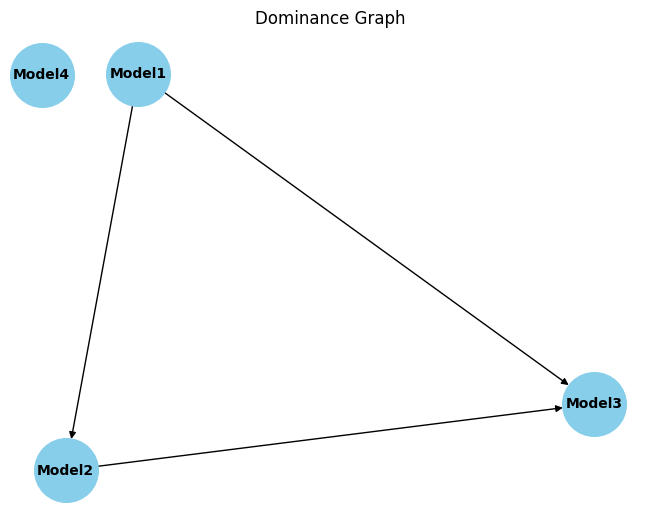

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}


df = pd.DataFrame(data)



# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominating_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominating_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the dominance graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(dominance_graph)
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G, seed=48, k=1.5)
#pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.4, 0.6])

nx.draw(G, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Dominance Graph")
plt.show()


Dominating Models: ['A']
Non-Dominated Models: ['D']
Failing Models: ['B', 'C']
Models in order of dominance: ['A', 'D', 'B', 'C']


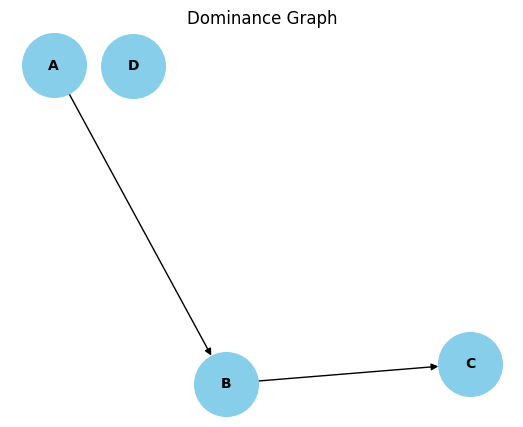

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'Model': ['A', 'B', 'C', 'D'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}

df = pd.DataFrame(data)

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)


# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


In [31]:
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    "Model": ["A", "B", "C", "D"],
    "RMSE_mean": [1.5, 2.0, 2.5, 2.1],
    "RMSE_std": [0.2, 0.25, 0.3, 0.25],
    "MAE_mean": [1.0, 1.5, 2.0, 1.4],
    "MAE_std": [0.1, 0.15, 0.2, 0.12],
    "MAPE_mean": [3.0, 4.0, 5.0, 2.8],
    "MAPE_std": [0.5, 0.6, 0.7, 0.4],
    "R2_mean": [0.9, 0.85, 0.8, 0.75],
    "R2_std": [0.05, 0.06, 0.07, 0.08],
}

df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

In [32]:
df[["Model", "RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]

# df = df.set_index("Model")

df

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std
0,A,1.5,0.20,1.0,0.10,3.0,0.5,0.90,0.05
1,B,2.0,0.25,1.5,0.15,4.0,0.6,0.85,0.06
2,C,2.5,0.30,2.0,0.20,5.0,0.7,0.80,0.07
3,D,2.1,0.25,1.4,0.12,2.8,0.4,0.75,0.08


<IPython.core.display.Javascript object>

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(
    df[["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]
)

# Creating a new dataframe with standardized values
standardized_df = pd.DataFrame(
    standardized_metrics,
    columns=["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"],
)

# Summing all metrics and subtracting R2_mean
standardized_df["Result"] = (
    standardized_df[["RMSE_mean", "MAE_mean", "MAPE_mean"]].sum(axis=1)
    - standardized_df["R2_mean"]
)

<IPython.core.display.Javascript object>

In [34]:
standardized_df["Model"] = df["Model"]
standardized_df

,RMSE_mean,MAE_mean,MAPE_mean,R2_mean,Result,Model
0,-1.473911,-1.333539,-0.797724,1.341641,-4.946814,A
1,-0.070186,0.070186,0.341882,0.447214,-0.105332,B
2,1.333539,1.473911,1.481487,-0.447214,4.736151,C
3,0.210559,-0.210559,-1.025645,-1.341641,0.315996,D


<IPython.core.display.Javascript object>

Dominating Models: ['A']
Non-Dominated Models: []
Failing Models: ['B', 'C', 'D']
Models in order of dominance: ['A', 'B', 'D', 'C']


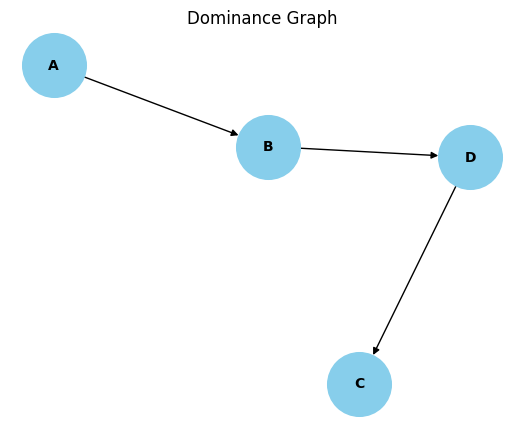

<IPython.core.display.Javascript object>

In [35]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

df = standardized_df
# Function to compare two models strictly
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    return model1['Result'] < model2['Result']

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


In [36]:
dominance_matrix

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False, False],
       [False, False,  True, False]])

<IPython.core.display.Javascript object>

Dominant Models: ['Model1', 'Model4']
Non-Dominated Models: ['Model4']
Failing Models: ['Model3']
Models in order of dominance: ['Model1', 'Model4', 'Model2', 'Model3']


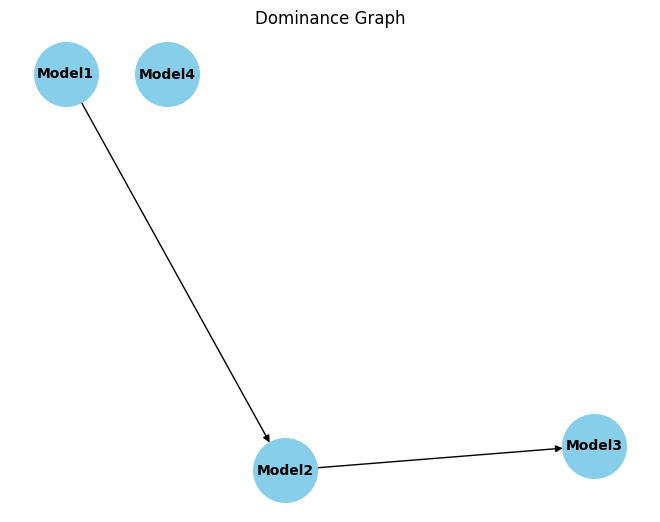

<IPython.core.display.Javascript object>

In [37]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}

df = pd.DataFrame(data)

# Function to compare two models strictly
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    return (model1['RMSE_mean'] < model2['RMSE_mean'] and
            model1['MAE_mean'] < model2['MAE_mean'] and
            model1['MAPE_mean'] < model2['MAPE_mean'] and
            model1['R2_mean'] > model2['R2_mean'])

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i] and not dominates_any[i]]

print("Dominant Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])

nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Dominance Graph")
plt.show()


In [38]:
df_full.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [39]:
df_full["plant"].unique()

array(['aa', 'ac', 'ag', 'ai', 'am', 'an', 'ap', 'as', 'az', 'e', 'h',
       'j', 'k', 'l', 'n', 'p', 'q', 's', 'u', 'v', 'w', 'x', 'z'],
      dtype=object)

<IPython.core.display.Javascript object>

In [40]:
df_full_209 = df_full[df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)
df_full_209 = df_full[~df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

In [41]:
df_full.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [42]:
df_full_209.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [43]:
df_full_209.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [44]:
df_full_209[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,28155.0,4.71,8.55,0.26,1.89,3.07,5.48,776.07
MAE Test,28155.0,3.58,5.48,0.20,1.48,2.38,4.28,476.59
MAPE Test,28155.0,0.08,0.13,0.01,0.03,0.05,0.10,10.22
R2 Test,28155.0,-21.31,501.68,-68227.01,-1.46,0.33,0.81,0.99


<IPython.core.display.Javascript object>

In [45]:
df_full_209[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,28155.0,4.71,8.55,0.26,1.89,3.07,5.48,776.07
MAE Test,28155.0,3.58,5.48,0.20,1.48,2.38,4.28,476.59
MAPE Test,28155.0,0.08,0.13,0.01,0.03,0.05,0.10,10.22
R2 Test,28155.0,-21.31,501.68,-68227.01,-1.46,0.33,0.81,0.99


<IPython.core.display.Javascript object>

# Analysis (full results)

In [46]:
df_full_209 = df_full[~df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

## 209

In [47]:
df_full_209.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [48]:
df_full_209["Company"].unique()

array([209])

<IPython.core.display.Javascript object>

### Variable Grouping: CM

In [49]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [50]:
df_results_full_cm = (
    df_full_209[df_full_209["Features"].eq("Chemical + Mineralogical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [51]:
df_results_full_cm["Features"].unique()

array(['Chemical + Mineralogical'], dtype=object)

<IPython.core.display.Javascript object>

In [52]:
df_results_full_cm.shape

(9385, 24)

<IPython.core.display.Javascript object>

#### K-Fold

In [53]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [54]:
df_results_full_cm_kf = (
    df_results_full_cm[df_results_full_cm["Cross Validation"].eq("Repeated KFold")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [55]:
df_results_full_cm_kf["Cross Validation"].unique()

array([], dtype=object)

<IPython.core.display.Javascript object>

In [56]:
df_results_full_cm_kf.shape

(0, 24)

<IPython.core.display.Javascript object>

In [57]:
df_results_full_cm_kf.groupby(["Company", "Model", "Timesteps"], dropna=False)[
    "RMSE Test"
].mean().shape

(0,)

<IPython.core.display.Javascript object>

### Blocking time series

In [58]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [59]:
df_results_full_cm_btss = (
    df_results_full_cm[
        df_results_full_cm["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [60]:
df_results_full_cm_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [61]:
df_results_full_cm_btss.shape

(4580, 24)

<IPython.core.display.Javascript object>

In [62]:
df_results_full_cm_btss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(364,)

<IPython.core.display.Javascript object>

### Time Series Split

In [63]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [64]:
df_results_full_cm_tss = (
    df_results_full_cm[df_results_full_cm["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [65]:
df_results_full_cm_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [66]:
df_results_full_cm_tss.shape

(4805, 24)

<IPython.core.display.Javascript object>

In [67]:
df_results_full_cm_tss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(381,)

<IPython.core.display.Javascript object>

### Variable Grouping: CM-P

In [68]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [69]:
df_results_full_cm_p = (
    df_full_209[
        df_full_209["Features"].eq("Chemical + Mineralogical + Physical - Early CS")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [70]:
df_results_full_cm_p["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [71]:
df_results_full_cm_p.shape

(9385, 24)

<IPython.core.display.Javascript object>

### Blocking time series

In [72]:
df_results_full_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [73]:
df_results_full_cm_p_btss = (
    df_results_full_cm_p[
        df_results_full_cm_p["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [74]:
df_results_full_cm_p_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [75]:
df_results_full_cm_p_btss.shape

(4580, 24)

<IPython.core.display.Javascript object>

In [76]:
df_results_full_cm_p_btss.shape, df_results_full_cm_btss.shape

((4580, 24), (4580, 24))

<IPython.core.display.Javascript object>

In [77]:
df_results_full_cm_p_btss.groupby(
    ["Company", "Cross Validation", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(364,)

<IPython.core.display.Javascript object>

In [78]:
df_results_full_cm_btss.shape, df_results_full_cm_p_btss.shape

df1 = df_results_full_cm_btss
df2 = df_results_full_cm_p_btss

grouping_columns = ["Company", "Plant", "Model", "Timesteps"]

<IPython.core.display.Javascript object>

In [79]:
# Group by and get sizes for both datasets
group_sizes_df1 = df1.groupby(grouping_columns, dropna=False).size()
group_sizes_df2 = df2.groupby(grouping_columns, dropna=False).size()

# Compare group sizes directly
group_size_diff = group_sizes_df1.compare(group_sizes_df2)
print("Differences in group sizes:")
print(group_size_diff)

Differences in group sizes:
Empty DataFrame
Columns: [self, other]
Index: []


<IPython.core.display.Javascript object>

In [80]:
# Group by and get sizes for both datasets
group_sizes_df1 = df1.groupby(grouping_columns, dropna=False).size()
group_sizes_df2 = df2.groupby(grouping_columns, dropna=False).size()

# Compare group sizes directly
group_size_diff = group_sizes_df2.compare(group_sizes_df1)
print("Differences in group sizes:")
print(group_size_diff)

Differences in group sizes:
Empty DataFrame
Columns: [self, other]
Index: []


<IPython.core.display.Javascript object>

### Time Series Split

In [81]:
df_results_full_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [82]:
df_results_full_cm_p_tss = (
    df_results_full_cm_p[
        df_results_full_cm_p["Cross Validation"].eq("Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [83]:
df_results_full_cm_p_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [84]:
df_results_full_cm_p_tss.shape

(4805, 24)

<IPython.core.display.Javascript object>

In [85]:
df_results_full_cm_p_tss.groupby(
    ["Company", "Model", "Plant", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(381,)

<IPython.core.display.Javascript object>

### Variable Grouping: CM-P-CS

In [86]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [87]:
df_results_full_cm_p_cs = (
    df_full_209[df_full_209["Features"].eq("Chemical + Mineralogical + Physical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [88]:
df_results_full_cm_p_cs["Features"].unique()

array(['Chemical + Mineralogical + Physical'], dtype=object)

<IPython.core.display.Javascript object>

In [89]:
df_results_full_cm_p_cs.shape

(9385, 24)

<IPython.core.display.Javascript object>

### K-Fold

In [90]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [91]:
df_results_full_cm_p_cs_kf = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Repeated KFold")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [92]:
df_results_full_cm_p_cs_kf["Cross Validation"].unique()

array([], dtype=object)

<IPython.core.display.Javascript object>

In [93]:
df_results_full_cm_p_cs_kf.shape

(0, 24)

<IPython.core.display.Javascript object>

In [94]:
df_results_full_cm_p_cs_kf.groupby(["Company", "Model", "Timesteps"], dropna=False)[
    "RMSE Test"
].mean().shape

(0,)

<IPython.core.display.Javascript object>

### Blocking time series

In [95]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [96]:
df_results_full_cm_p_cs_btss = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [97]:
df_results_full_cm_p_cs_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [98]:
df_results_full_cm_p_cs_btss.shape

(4580, 24)

<IPython.core.display.Javascript object>

In [99]:
df_results_full_cm_p_cs_btss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(364,)

<IPython.core.display.Javascript object>

### Time Series Split

In [100]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [101]:
df_results_full_cm_p_cs_tss = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [102]:
df_results_full_cm_p_cs_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [103]:
df_results_full_cm_p_cs_tss.shape

(4805, 24)

<IPython.core.display.Javascript object>

In [104]:
df_results_full_cm_p_cs_tss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(381,)

<IPython.core.display.Javascript object>

# Grouped Dataset

In [105]:
dfs_plant = dict()
column = ("plant", "")
pos = 2

for plant, csv_files in csv_files_path_grouped.items():
    df = read_csv_files_grouped(csv_files, plant)
    df["plant"] = plant
    df = preprocess_rename_columns(df)
    df = preprocess_change_columns_order(df, column, pos)
    dfs_plant[plant] = df

<IPython.core.display.Javascript object>

In [106]:
df = pd.concat(dfs_plant)
df_copy = df.copy()
df_copy = (
    df_copy.reset_index(level=0)
    .rename({"level_0": "Plant"}, axis=1)
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [107]:
df_copy.shape

(11044, 26)

<IPython.core.display.Javascript object>

## Preprocessing steps

In [108]:
patterns = [
    "Chemical + Mineralogical + Feature Engineering",
    "Chemical + Mineralogical + CS7 + One-Hot",
    "Chemical + Mineralogical + Physical + One-Hot",
    "Chemical + Mineralogical + CS3 + One-Hot",
    "Chemical + Mineralogical + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + One-Hot",
    "Chemical + Mineralogical + CS1 + One-Hot",
    "Chemical + Mineralogical + CS2 + One-Hot",
    "Chemical + Feature Engineering",
]

replace_dict = {
    "Chemical + Mineralogical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS2": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS7": "Chemical + Mineralogical + Early CS",
}

replace_dict_2 = {
    "Chemical": "Chemical + Mineralogical",
    "Chemical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Mineralogical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Physical": "Chemical + Mineralogical + Physical",
}

df_copy = df_copy[~df_copy["Cross Validation"].eq("Out of time Split")].reset_index(
    drop=True
)

# Removing afterwards
df_copy = df_copy[~df_copy["Cross Validation"].eq("Repeated KFold")].reset_index(
    drop=True
)

df_copy = df_copy[~df_copy["Features"].apply(lambda x: x in patterns)].reset_index(
    drop=True
)
df_copy["Features_bkp"] = df_copy["Features"].copy()
df_copy["Features"] = df_copy["Features"].replace(replace_dict)

df_copy["Features"] = df_copy["Features"].replace(replace_dict_2)

# Removing afterwards
df_copy = df_copy[
    ~df_copy["Features"].eq("Chemical + Mineralogical + Early CS")
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [109]:
df_copy[("MAPE Train", "mean")] = df_copy[("MAPE Train", "mean")] * 100
df_copy[("MAPE Train", "std")] = df_copy[("MAPE Train", "std")] * 100
df_copy[("MAPE Test", "mean")] = df_copy[("MAPE Test", "mean")] * 100
df_copy[("MAPE Test", "std")] = df_copy[("MAPE Test", "std")] * 100

df_copy["Model_bkp"] = df_copy["Model"].copy()
df_copy["Model_bkp_2"] = df_copy["Model"] + df_copy["Timesteps"].apply(
    lambda x: "" if pd.isna(x) else "_" + str(x)
)
df_copy["Model"] = df_copy["Model"].replace(
    {
        "MLP": "Neural Networks",
        "LSTM": "Neural Networks",
        "GRU": "Neural Networks",
        "BidirectionalLSTM": "Neural Networks",
        "BidirectionalGRU": "Neural Networks",
        "Transformer": "Neural Networks",
        "Decision Tree": "Trees",
        "Random Forest": "Trees",
        "XGBoost": "Trees",
    }
)

<IPython.core.display.Javascript object>

In [110]:
df_copy["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [111]:
df_copy["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [112]:
df_copy["Model"].unique()

array(['Trees', 'Neural Networks', 'Linear Regression'], dtype=object)

<IPython.core.display.Javascript object>

In [113]:
df_copy["Model_bkp"].unique()

array(['Random Forest', 'Transformer', 'BidirectionalGRU', 'GRU', 'MLP',
       'Decision Tree', 'BidirectionalLSTM', 'XGBoost',
       'Linear Regression', 'LSTM'], dtype=object)

<IPython.core.display.Javascript object>

In [114]:
df_copy["Model_bkp_2"].unique()

array(['Random Forest', 'Transformer_1.0', 'Transformer_7.0',
       'Transformer_14.0', 'BidirectionalGRU_1.0', 'BidirectionalGRU_7.0',
       'BidirectionalGRU_14.0', 'GRU_1.0', 'GRU_7.0', 'GRU_14.0', 'MLP',
       'Decision Tree', 'BidirectionalLSTM_1.0', 'BidirectionalLSTM_7.0',
       'BidirectionalLSTM_14.0', 'XGBoost', 'Linear Regression',
       'LSTM_1.0', 'LSTM_7.0', 'LSTM_14.0'], dtype=object)

<IPython.core.display.Javascript object>

In [115]:
df_copy.shape

(2235, 29)

<IPython.core.display.Javascript object>

In [116]:
df_copy_grouped = df_copy.copy()

<IPython.core.display.Javascript object>

In [117]:
df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,mean,2235.0,4.25,3.78,0.74,1.95,3.30,5.28,65.45
MAE Test,mean,2235.0,3.23,2.69,0.56,1.52,2.53,4.03,41.17
MAPE Test,mean,2235.0,7.49,6.27,1.32,3.59,5.81,9.24,89.16
R2 Test,mean,2235.0,-17.67,155.37,-4690.18,-1.90,0.09,0.77,0.98


<IPython.core.display.Javascript object>

In [118]:
(df_copy[("R2 Test", "mean")] < 0).sum()

1075

<IPython.core.display.Javascript object>

In [119]:
(df_copy[("MAPE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [120]:
(df_copy[("RMSE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [121]:
(df_copy[("MAE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [122]:
(
    (df_copy[("R2 Test", "mean")] < 0)
    | (df_copy[("MAPE Test", "mean")] > 100)
    | (df_copy[("RMSE Test", "mean")] > 100)
    | (df_copy[("MAE Test", "mean")] > 100)
).sum()

1075

<IPython.core.display.Javascript object>

In [123]:
df_copy_2 = df_copy.copy()

<IPython.core.display.Javascript object>

In [124]:
df_copy = df_copy[
    ~(
        (df_copy[("R2 Test", "mean")] < 0)
        | (df_copy[("MAPE Test", "mean")] > 100)
        | (df_copy[("RMSE Test", "mean")] > 100)
        | (df_copy[("MAE Test", "mean")] > 100)
    )
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [125]:
df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,mean,1160.0,2.39,1.07,0.74,1.60,2.13,2.99,6.91
MAE Test,mean,1160.0,1.86,0.84,0.56,1.25,1.63,2.31,5.33
MAPE Test,mean,1160.0,4.36,1.91,1.32,2.98,3.90,5.29,11.87
R2 Test,mean,1160.0,0.64,0.28,0.00,0.43,0.76,0.89,0.98


<IPython.core.display.Javascript object>

In [126]:
em_copy = df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].copy()

em_copy.columns = ["RMSE", "MAE", "MAPE", "R2"]
em_copy.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE,1160.0,2.39,1.07,0.74,1.60,2.13,2.99,6.91
MAE,1160.0,1.86,0.84,0.56,1.25,1.63,2.31,5.33
MAPE,1160.0,4.36,1.91,1.32,2.98,3.90,5.29,11.87
R2,1160.0,0.64,0.28,0.00,0.43,0.76,0.89,0.98


<IPython.core.display.Javascript object>

In [127]:
df_copy[
    [
        ("RMSE Test", "std"),
        ("MAE Test", "std"),
        ("MAPE Test", "std"),
        ("R2 Test", "std"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,std,1160.0,0.76,0.66,0.04,0.33,0.55,0.95,5.08
MAE Test,std,1160.0,0.58,0.52,0.03,0.25,0.40,0.71,4.44
MAPE Test,std,1160.0,1.34,1.16,0.06,0.58,0.98,1.65,9.04
R2 Test,std,1160.0,0.24,0.27,0.00,0.05,0.13,0.35,2.06


<IPython.core.display.Javascript object>

In [128]:
df_copy.shape

(1160, 29)

<IPython.core.display.Javascript object>

In [129]:
df_copy["plant"].unique()

array(['aa', 'ac', 'ai', 'am', 'an', 'ap', 'as', 'az', 'e', 'h', 'j', 'k',
       'l', 'n', 'p', 'q', 's', 'u', 'v', 'w', 'x', 'z'], dtype=object)

<IPython.core.display.Javascript object>

In [130]:
df_209_groupd = df_copy_grouped[
    ~df_copy_grouped["plant"].isin(["partner_i", "partner_ii", "partner_iv"])
]

<IPython.core.display.Javascript object>

In [131]:
df_209_groupd.shape

(2235, 29)

<IPython.core.display.Javascript object>

In [132]:
df_full.shape

(28155, 24)

<IPython.core.display.Javascript object>

In [133]:
cols_groupby = [
    # "Category",
    # "Company",
    "plant",
    # "Data Shape",
    "Timesteps",
    "Features_bkp",
    "Model",
    "Cross Validation",
    "Cross Validation Params",
]

cols_agg = ["RMSE Train", "MAE Train", "MAPE Train", "R2 Train"] + [
    "RMSE Test",
    "MAE Test",
    "MAPE Test",
    "R2 Test",
]

df_results_to_save = (
    df_full.groupby(cols_groupby, dropna=False)[cols_agg]
    .agg(["mean", lambda series: pd.Series(series.std(ddof=0), name="std")])
    .reset_index()
    .rename(columns={"<lambda_0>": "std"})
)

<IPython.core.display.Javascript object>

In [134]:
df_results_to_save.shape

(2235, 22)

<IPython.core.display.Javascript object>

In [135]:
df_copy_grouped.shape

(2235, 29)

<IPython.core.display.Javascript object>

# Topological Analysis - NEW

## Definitions

In [136]:
# Function to compare two models strictly based on means only
def dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    # Check if model1 is at least as good as model2 in all metrics
    at_least_as_good = (
        model1["RMSE_mean"] <= model2["RMSE_mean"]
        and model1["MAE_mean"] <= model2["MAE_mean"]
        and model1["MAPE_mean"] <= model2["MAPE_mean"]
        and model1["R2_mean"] >= model2["R2_mean"]
    )

    # Check if model1 is strictly better in at least one metric
    strictly_better_in_one = (
        model1["RMSE_mean"] < model2["RMSE_mean"]
        or model1["MAE_mean"] < model2["MAE_mean"]
        or model1["MAPE_mean"] < model2["MAPE_mean"]
        or model1["R2_mean"] > model2["R2_mean"]
    )

    # Model1 strictly dominates Model2 if it is at least as good in all metrics and
    # strictly better in at least one metric
    return at_least_as_good and strictly_better_in_one

<IPython.core.display.Javascript object>

In [137]:
def get_dominance_matrix_and_graph(df):
    n = len(df)
    dominance_matrix = np.zeros((n, n), dtype=bool)

    for i in range(n):
        for j in range(n):
            if i != j:
                dominance_matrix[i, j] = dominates(df.iloc[i], df.iloc[j])

    # Create the dominance graph
    dominance_graph = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if dominance_matrix[i, j]:
                dominance_graph[i].append(j)

    return dominance_matrix, dominance_graph

<IPython.core.display.Javascript object>

In [138]:
# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

<IPython.core.display.Javascript object>

In [139]:
# Function to find the top models in each group
def find_top_models(group):
    max_net_dominance = group["Net_Dominance"].max()
    top_models = group[group["Net_Dominance"] == max_net_dominance]
    return top_models

<IPython.core.display.Javascript object>

### Dominance Analysis and SCPM

In [140]:
def compute_scpm(df):
    scaler = StandardScaler()
    standardized_metrics = scaler.fit_transform(
        df[["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]
    )

    # Creating a new dataframe with standardized values
    standardized_df = pd.DataFrame(
        standardized_metrics,
        columns=["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"],
    )

    # Summing all metrics and subtracting R2_mean
    standardized_df["Result"] = (
        standardized_df[["RMSE_mean", "MAE_mean", "MAPE_mean"]].sum(axis=1)
        - standardized_df["R2_mean"]
    )

    df["SCPM"] = standardized_df["Result"]
    return df

<IPython.core.display.Javascript object>

In [141]:
def make_dominance_analysis(df):
    # Compute dominance matrix and graph
    dominance_matrix, dominance_graph = get_dominance_matrix_and_graph(df)

    # Get the topological order
    topo_order = topological_sort(dominance_graph)
    df = df.copy()
    n = len(topo_order)

    # Identify Dominant Models
    dominant_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if not np.any(dominance_matrix[:, i])
    ]

    # Identify Non-Dominant Models
    non_dominant_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if np.any(dominance_matrix[:, i])
    ]

    # Identify Models that are both dominated and dominate at least one
    intermediate_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if np.any(dominance_matrix[:, i]) and np.any(dominance_matrix[i, :])
    ]

    # Add count of times each model is dominated by others
    df["Dominated_Count"] = np.sum(dominance_matrix, axis=0)

    # Classify models
    df["Classification"] = "intermediate_model"  # default to intermediate_model
    df.loc[
        ~np.any(dominance_matrix, axis=1) & np.any(dominance_matrix, axis=0),
        "Classification",
    ] = "non_dominant_model"
    df.loc[~np.any(dominance_matrix, axis=0), "Classification"] = "dominant_model"

    # Map the topological order to the model names and get dominance counts
    sorted_models = [df["Model"].iloc[i] for i in topo_order]

    df_sorted = df.iloc[topo_order].copy()
    df_sorted["Dominates_Count"] = dominance_matrix.sum(axis=1)[topo_order]
    df_sorted_topo = df_sorted.copy()

    df_sorted = df_sorted.sort_values(by="Dominates_Count", ascending=False)
    df_sorted_count = df_sorted.copy()

    return {
        "dominance_matrix": dominance_matrix,
        "dominance_graph": dominance_graph,
        "df_sorted_topo": df_sorted_topo,
        "df_sorted_count": df_sorted_count,
    }

<IPython.core.display.Javascript object>

# Analysis

## 209

In [142]:
# Filter only 209 project
df_209_grouped = df_copy_grouped[
    ~df_copy_grouped["plant"].isin(["partner_i", "partner_ii", "partner_iv"])
]

<IPython.core.display.Javascript object>

In [143]:
df_results = df_209_grouped[
    [
        ("Company", ""),
        ("plant", ""),
        ("Cross Validation", ""),
        ("Features", ""),
        ('Features_bkp', ''),
        ("Model", ""),
        ("Model_bkp", ""),         
        ('Model_bkp_2',''),
        ("Timesteps", ""),
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
        ("RMSE Test", "std"),
        ("MAE Test", "std"),
        ("MAPE Test", "std"),
        ("R2 Test", "std"),
    ]
].copy()
df_results = df_results.reset_index(drop=True)

# Rename columns
new_column_names = [
    "Company",
    "Plant",
    "Cross Validation",
    "Features",
    "Features_bkp",
    "Model",
    "Model_bkp",
    "Model_bkp_2",
    "Timesteps",
    "RMSE_mean",
    "MAE_mean",
    "MAPE_mean",
    "R2_mean",
    "RMSE_std",
    "MAE_std",
    "MAPE_std",
    "R2_std",
]

df_results.columns = new_column_names


<IPython.core.display.Javascript object>

In [144]:
df_results.shape

(2235, 17)

<IPython.core.display.Javascript object>

In [145]:
df_results["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

## Variable Grouping: CM

In [146]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [147]:
df_results_cm = (
    df_results[df_results["Features"].eq("Chemical + Mineralogical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [148]:
df_results_cm["Features"].unique()

array(['Chemical + Mineralogical'], dtype=object)

<IPython.core.display.Javascript object>

In [149]:
df_results_cm.shape

(745, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [150]:
df_results_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [151]:
df_results_cm_btss = (
    df_results_cm[df_results_cm["Cross Validation"].eq("Blocking Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [152]:
df_results_cm_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [153]:
df_results_cm_btss.shape

(364, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [154]:
df_results_cm_btss = compute_scpm(df_results_cm_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [155]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_btss)
dominance_matrix_cm_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [156]:
dominance_matrix_cm_btss.shape, len(dominance_graph_cm_btss)

((364, 364), 364)

<IPython.core.display.Javascript object>

In [157]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    360
dominant_model          2
non_dominant_model      2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [158]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/209/209_dominance_analysis_cm_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [159]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
283,209,s,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.063663,...,1.924550,0.958068,0.290868,0.151661,0.377315,0.025461,-3.590332,0,dominant_model,362
346,209,x,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Linear Regression,Linear Regression,Linear Regression,NaN,1.052150,...,2.280657,0.273824,0.370891,0.358083,0.857604,0.591609,-3.499298,0,dominant_model,230
274,209,s,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Neural Networks,Transformer,Transformer_1.0,1.0,1.101367,...,2.281702,0.953325,0.310278,0.265886,0.686515,0.026202,-3.469694,1,intermediate_model,356
286,209,s,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,Decision Tree,Decision Tree,NaN,1.178945,...,2.122180,0.948914,0.312617,0.146540,0.362208,0.029458,-3.486454,1,intermediate_model,356
338,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.347412,...,2.014756,0.912050,0.477162,0.190533,0.396607,0.069741,-3.450020,1,intermediate_model,340


<IPython.core.display.Javascript object>

In [160]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [161]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
283,Random Forest,1.06,0.29,0.79,0.15,1.92,0.38,0.96,0.03,-3.59,0,dominant_model,362,s
286,Decision Tree,1.18,0.31,0.87,0.15,2.12,0.36,0.95,0.03,-3.49,1,intermediate_model,356,s
274,Transformer_1.0,1.10,0.31,0.91,0.27,2.28,0.69,0.95,0.03,-3.47,1,intermediate_model,356,s
275,Transformer_7.0,1.14,0.39,0.94,0.29,2.42,0.77,0.95,0.04,-3.42,2,intermediate_model,351,s
284,Linear Regression,1.29,0.19,1.02,0.17,2.51,0.38,0.94,0.01,-3.33,4,intermediate_model,347,s


<IPython.core.display.Javascript object>

In [162]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [163]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
286,Decision Tree,1.18,0.31,0.87,0.15,2.12,0.36,0.95,0.03,-3.49,1,intermediate_model,356,s
274,Transformer_1.0,1.10,0.31,0.91,0.27,2.28,0.69,0.95,0.03,-3.47,1,intermediate_model,356,s
275,Transformer_7.0,1.14,0.39,0.94,0.29,2.42,0.77,0.95,0.04,-3.42,2,intermediate_model,351,s


<IPython.core.display.Javascript object>

In [164]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(360, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [165]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:2]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
42,MLP,15.07,4.41,13.89,4.88,37.34,13.12,-590.03,617.04,22.27,361,non_dominant_model,0,ag
252,MLP,23.75,8.79,22.08,8.96,44.02,17.46,-545.09,526.04,28.60,362,non_dominant_model,0,p


<IPython.core.display.Javascript object>

In [166]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [167]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [168]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      273
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [169]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [170]:
# pd.set_option("display.max_rows", None)
# df_sorted_topo_models_grouped

<IPython.core.display.Javascript object>

In [171]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [172]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model       95.65
                  dominant_model            4.35
Neural Networks   intermediate_model       99.27
                  non_dominant_model        0.73
Trees             intermediate_model       98.53
                  dominant_model            1.47

<IPython.core.display.Javascript object>

In [173]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           273.00   68.00
                mean               45.96           170.51   40.40
                std                40.15            95.86   38.25
                min                 0.00             1.00    0.00
                25%                14.00            93.00   12.75
                50%                45.00           181.00   24.50
                75%                67.50           243.00   53.25
                max               141.00           362.00  142.00
Dominates_Count count              23.00           273.00   68.00
                mean              213.13           109.75  227.78
                std                57.65            91.60   57.50
                min               109.00             0.00  118.00
                25%               169.00            32.00  185.00
                50%               210.00            86.00  225.00
                75%               245.50           171.00  255.25
                max               347.00           356.00  362.00

<IPython.core.display.Javascript object>

In [174]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [175]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,2,intermediate_model,22
Neural Networks,273,2,intermediate_model,271
Trees,68,2,intermediate_model,67


<IPython.core.display.Javascript object>

In [176]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     22
                   dominant_model          1
Neural Networks    intermediate_model    271
                   non_dominant_model      2
Trees              intermediate_model     67
                   dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [177]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [178]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [179]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,213.130435,210.0,1057,4902,13.467033
Neural Networks,273,109.747253,86.0,46548,29961,82.310440
Trees,68,227.779412,225.0,2747,15489,42.552198


<IPython.core.display.Javascript object>

In [180]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  2.232710  0.846697  1.052150  1.736213  1.938123   
Neural Networks       273.0  5.349023  3.141925  1.101367  2.912067  4.680729   
Trees                  68.0  2.141431  0.732320  1.063663  1.675379  1.842642   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  2.620051   4.134031     23.0  0.564470  ...   
Neural Networks    6.922677  23.747976    273.0  2.248699  ...   
Trees              2.672336   3.898566     68.0  0.644812  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression           67.50  141.0            23.0  213.130435   
Neural Networks            243.00  362.0           273.0  109.747253   
Trees                       53.25  142.0            68.0  227.779412   

                                                                  
                         std    min    25%    50%     75%    max  
Model                                                             
Linear Regression  57.654381  109.0  169.0  210.0  245.50  347.0  
Neural Networks    91.604038    0.0   32.0   86.0  171.00  356.0  
Trees              57.504275  118.0  185.0  225.0  255.25  362.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [181]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [182]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [183]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [184]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
283,Random Forest,1.06,0.29,0.79,0.15,1.92,0.38,0.96,0.03,-3.59,0,362,dominant_model,s,True
346,Linear Regression,1.05,0.37,0.85,0.36,2.28,0.86,0.27,0.59,-3.50,0,230,dominant_model,x,True
286,Decision Tree,1.18,0.31,0.87,0.15,2.12,0.36,0.95,0.03,-3.49,1,356,intermediate_model,s,False
274,Transformer_1.0,1.10,0.31,0.91,0.27,2.28,0.69,0.95,0.03,-3.47,1,356,intermediate_model,s,False
338,Random Forest,1.35,0.48,0.87,0.19,2.01,0.40,0.91,0.07,-3.45,1,340,intermediate_model,w,True


<IPython.core.display.Javascript object>

### Time Series Split

In [185]:
df_results_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [186]:
df_results_cm_tss = (
    df_results_cm[df_results_cm["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [187]:
df_results_cm_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [188]:
df_results_cm_tss.shape

(381, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [189]:
df_results_cm_tss = compute_scpm(df_results_cm_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [190]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_tss)
dominance_matrix_cm_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [191]:
dominance_matrix_cm_tss.shape, len(dominance_graph_cm_tss)

((381, 381), 381)

<IPython.core.display.Javascript object>

In [192]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    378
dominant_model          2
non_dominant_model      1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [193]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_dominance_analysis_cm_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [194]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
276,209,s,Time Series Split,Chemical + Mineralogical,Chemical,Neural Networks,Transformer,Transformer_1.0,1.0,1.174792,...,2.139835,0.947505,0.297583,0.209304,0.450223,0.024692,-2.318442,0,dominant_model,379
289,209,s,Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.189475,...,2.049671,0.946343,0.284627,0.126587,0.291970,0.021361,-2.342061,0,dominant_model,378
40,209,ag,Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.175271,...,2.715182,-0.725349,0.217511,0.218284,0.640332,0.680439,-2.180302,1,intermediate_model,116
277,209,s,Time Series Split,Chemical + Mineralogical,Chemical,Neural Networks,Transformer,Transformer_7.0,7.0,1.354375,...,2.594853,0.929044,0.376346,0.303135,0.688145,0.036551,-2.139849,2,intermediate_model,368
290,209,s,Time Series Split,Chemical + Mineralogical,Chemical,Linear Regression,Linear Regression,Linear Regression,NaN,1.365165,...,2.595642,0.929227,0.341606,0.248860,0.559864,0.032124,-2.144474,2,intermediate_model,368


<IPython.core.display.Javascript object>

In [195]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [196]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
276,Transformer_1.0,1.17,0.30,0.87,0.21,2.14,0.45,0.95,0.02,-2.32,0,dominant_model,379,s
289,Random Forest,1.19,0.28,0.83,0.13,2.05,0.29,0.95,0.02,-2.34,0,dominant_model,378,s
292,Decision Tree,1.37,0.47,0.88,0.16,2.15,0.38,0.93,0.04,-2.27,2,intermediate_model,370,s
290,Linear Regression,1.37,0.34,1.04,0.25,2.60,0.56,0.93,0.03,-2.14,2,intermediate_model,368,s
277,Transformer_7.0,1.35,0.38,1.06,0.30,2.59,0.69,0.93,0.04,-2.14,2,intermediate_model,368,s


<IPython.core.display.Javascript object>

In [197]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [198]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:4].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
292,Decision Tree,1.37,0.47,0.88,0.16,2.15,0.38,0.93,0.04,-2.27,2,intermediate_model,370,s
290,Linear Regression,1.37,0.34,1.04,0.25,2.60,0.56,0.93,0.03,-2.14,2,intermediate_model,368,s
277,Transformer_7.0,1.35,0.38,1.06,0.30,2.59,0.69,0.93,0.04,-2.14,2,intermediate_model,368,s
349,Random Forest,1.44,0.33,0.95,0.14,2.24,0.33,0.92,0.04,-2.22,3,intermediate_model,364,w


<IPython.core.display.Javascript object>

In [199]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(378, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [200]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
39,LSTM_14.0,65.449606,192.271746,41.170103,117.956109,89.161413,252.921332,-4690.17829,16986.104525,56.616818,380,non_dominant_model,0,ac


<IPython.core.display.Javascript object>

In [201]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [202]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [203]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      290
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [204]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [205]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [206]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       99.31
                  dominant_model            0.34
                  non_dominant_model        0.34
Trees             intermediate_model       98.53
                  dominant_model            1.47

<IPython.core.display.Javascript object>

In [207]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           290.00   68.00
                mean               78.30           167.04   56.43
                std                64.73           104.09   51.15
                min                 2.00             0.00    0.00
                25%                20.00            76.50   12.75
                50%                74.00           164.50   36.50
                75%               116.00           249.75  100.75
                max               216.00           380.00  174.00
Dominates_Count count              23.00           290.00   68.00
                mean              174.52           123.71  208.69
                std                81.78           101.70   87.46
                min                44.00             0.00   64.00
                25%               121.50            33.00  140.75
                50%               157.00            91.50  197.00
                75%               214.50           204.00  274.00
                max               368.00           379.00  378.00

<IPython.core.display.Javascript object>

In [208]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [209]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,1,intermediate_model,23
Neural Networks,290,3,intermediate_model,288
Trees,68,2,intermediate_model,67


<IPython.core.display.Javascript object>

In [210]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     23
Neural Networks    intermediate_model    288
                   dominant_model          1
                   non_dominant_model      1
Trees              intermediate_model     67
                   dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [211]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [212]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,174.52,157.0,1801,4014,10.54
Neural Networks,290,123.71,91.5,48442,35875,94.16
Trees,68,208.69,197.0,3837,14191,37.25


<IPython.core.display.Javascript object>

In [213]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  2.643439  1.027245  1.349361  1.852220  2.613584   
Neural Networks       290.0  4.784416  4.755398  1.174792  2.647673  3.895113   
Trees                  68.0  2.325091  0.796207  1.175271  1.624039  2.117372   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  3.203624   5.116775     23.0  0.582584  ...   
Neural Networks    5.603057  65.449606    290.0  3.661266  ...   
Trees              2.864438   4.362968     68.0  0.471953  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression          116.00  216.0            23.0  174.521739   
Neural Networks            249.75  380.0           290.0  123.706897   
Trees                      100.75  174.0            68.0  208.691176   

                                                                  
                          std   min     25%    50%    75%    max  
Model                                                             
Linear Regression   81.776786  44.0  121.50  157.0  214.5  368.0  
Neural Networks    101.697565   0.0   33.00   91.5  204.0  379.0  
Trees               87.461251  64.0  140.75  197.0  274.0  378.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [214]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [215]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [216]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [217]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
289,Random Forest,1.19,0.28,0.83,0.13,2.05,0.29,0.95,0.02,-2.34,0,378,dominant_model,s,False
276,Transformer_1.0,1.17,0.30,0.87,0.21,2.14,0.45,0.95,0.02,-2.32,0,379,dominant_model,s,False
292,Decision Tree,1.37,0.47,0.88,0.16,2.15,0.38,0.93,0.04,-2.27,2,370,intermediate_model,s,False
349,Random Forest,1.44,0.33,0.95,0.14,2.24,0.33,0.92,0.04,-2.22,3,364,intermediate_model,w,False
328,XGBoost,1.25,0.38,0.97,0.33,2.62,0.82,0.81,0.10,-2.19,2,315,intermediate_model,v,False


<IPython.core.display.Javascript object>

### Variable Grouping: CM-P

In [218]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [219]:
df_results_cm_p = (
    df_results[
        df_results["Features"].eq("Chemical + Mineralogical + Physical - Early CS")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [220]:
df_results_cm_p["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [221]:
df_results_cm_p.shape

(745, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [222]:
df_results_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [223]:
df_results_cm_p_btss = (
    df_results_cm_p[
        df_results_cm_p["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [224]:
df_results_cm_p_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [225]:
df_results_cm_p.shape, df_results_cm_p_btss.shape

((745, 17), (364, 17))

<IPython.core.display.Javascript object>

###### SCPM computation

In [226]:
df_results_cm_p_btss = compute_scpm(df_results_cm_p_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [227]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_btss)
dominance_matrix_cm_p_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [228]:
dominance_matrix_cm_p_btss.shape, len(dominance_graph_cm_p_btss)

((364, 364), 364)

<IPython.core.display.Javascript object>

In [229]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    360
non_dominant_model      3
dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [230]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_dominance_analysis_cm_p_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [231]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
69,209,am,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.029710,...,1.917995,0.969237,0.052213,0.050918,0.125568,0.006512,-3.541434,0,dominant_model,363
79,209,am,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Neural Networks,Transformer,Transformer_1.0,1.0,1.103488,...,2.256438,0.964245,0.112704,0.126219,0.311139,0.010544,-3.410304,1,intermediate_model,351
82,209,am,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Decision Tree,Decision Tree,NaN,1.116811,...,2.070391,0.964066,0.079368,0.077877,0.197413,0.006216,-3.463172,1,intermediate_model,358
278,209,s,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.062346,...,1.995175,0.959648,0.216000,0.136839,0.330688,0.017070,-3.510055,1,intermediate_model,359
83,209,am,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Linear Regression,Linear Regression,Linear Regression,NaN,1.150149,...,2.254472,0.962255,0.090169,0.063859,0.151648,0.004180,-3.395877,2,intermediate_model,351


<IPython.core.display.Javascript object>

In [232]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [233]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
69,Random Forest,1.03,0.05,0.79,0.05,1.92,0.13,0.97,0.01,-3.54,0,dominant_model,363,am
278,Random Forest,1.06,0.22,0.81,0.14,2.00,0.33,0.96,0.02,-3.51,1,intermediate_model,359,s
82,Decision Tree,1.12,0.08,0.86,0.08,2.07,0.20,0.96,0.01,-3.46,1,intermediate_model,358,am
79,Transformer_1.0,1.10,0.11,0.92,0.13,2.26,0.31,0.96,0.01,-3.41,1,intermediate_model,351,am
83,Linear Regression,1.15,0.09,0.92,0.06,2.25,0.15,0.96,0.00,-3.40,2,intermediate_model,351,am


<IPython.core.display.Javascript object>

In [234]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [235]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
278,Random Forest,1.06,0.22,0.81,0.14,2.00,0.33,0.96,0.02,-3.51,1,intermediate_model,359,s
82,Decision Tree,1.12,0.08,0.86,0.08,2.07,0.20,0.96,0.01,-3.46,1,intermediate_model,358,am
79,Transformer_1.0,1.10,0.11,0.92,0.13,2.26,0.31,0.96,0.01,-3.41,1,intermediate_model,351,am


<IPython.core.display.Javascript object>

In [236]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(360, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [237]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
320,LSTM_14.0,10.18,7.68,9.43,7.42,25.16,19.09,-608.11,711.67,15.85,343,non_dominant_model,0,v
40,MLP,14.45,3.64,13.45,3.69,36.16,9.86,-519.76,543.89,19.30,360,non_dominant_model,0,ag
249,MLP,21.96,6.35,20.24,6.44,40.38,12.43,-469.98,501.91,24.32,360,non_dominant_model,0,p


<IPython.core.display.Javascript object>

In [238]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(3, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [239]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [240]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      273
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [241]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [242]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [243]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       98.90
                  non_dominant_model        1.10
Trees             intermediate_model       98.53
                  dominant_model            1.47

<IPython.core.display.Javascript object>

In [244]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           273.00   68.00
                mean               41.43           173.24   46.94
                std                39.03            93.16   34.67
                min                 2.00             1.00    0.00
                25%                14.00           106.00   20.25
                50%                29.00           176.00   40.00
                75%                52.00           243.00   61.00
                max               146.00           360.00  149.00
Dominates_Count count              23.00           273.00   68.00
                mean              236.91           110.97  230.82
                std                65.37            95.08   57.70
                min               122.00             0.00   99.00
                25%               190.00            34.00  197.75
                50%               238.00            80.00  227.00
                75%               287.00           176.00  260.75
                max               351.00           351.00  363.00

<IPython.core.display.Javascript object>

In [245]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,1,intermediate_model,23
Neural Networks,273,2,intermediate_model,270
Trees,68,2,intermediate_model,67


<IPython.core.display.Javascript object>

In [246]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     23
Neural Networks    intermediate_model    270
                   non_dominant_model      3
Trees              intermediate_model     67
                   dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [247]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [248]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,236.913043,238.0,953,5449,14.969780
Neural Networks,273,110.970696,80.0,47295,30295,83.228022
Trees,68,230.823529,227.0,3192,15696,43.120879


<IPython.core.display.Javascript object>

In [249]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  1.813266  0.701470  1.115907  1.329845  1.674471   
Neural Networks       273.0  5.347459  3.111384  1.083244  2.997687  4.963465   
Trees                  68.0  1.876048  0.587838  1.029710  1.465813  1.729032   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  1.988727   4.097758     23.0  0.477436  ...   
Neural Networks    7.077770  21.959680    273.0  2.095916  ...   
Trees              2.210685   3.946189     68.0  0.547323  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression            52.0  146.0            23.0  236.913043   
Neural Networks             243.0  360.0           273.0  110.970696   
Trees                        61.0  149.0            68.0  230.823529   

                                                                   
                         std    min     25%    50%     75%    max  
Model                                                              
Linear Regression  65.372995  122.0  190.00  238.0  287.00  351.0  
Neural Networks    95.080495    0.0   34.00   80.0  176.00  351.0  
Trees              57.696825   99.0  197.75  227.0  260.75  363.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [250]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

In [251]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [252]:
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [253]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
69,Random Forest,1.03,0.05,0.79,0.05,1.92,0.13,0.97,0.01,-3.54,0,363,dominant_model,am,True
278,Random Forest,1.06,0.22,0.81,0.14,2.00,0.33,0.96,0.02,-3.51,1,359,intermediate_model,s,False
82,Decision Tree,1.12,0.08,0.86,0.08,2.07,0.20,0.96,0.01,-3.46,1,358,intermediate_model,am,True
285,Transformer_1.0,1.08,0.25,0.91,0.21,2.32,0.57,0.96,0.02,-3.41,2,347,intermediate_model,s,False
25,Random Forest,1.13,0.33,0.92,0.21,2.15,0.47,0.50,0.45,-3.41,3,243,intermediate_model,ac,False


<IPython.core.display.Javascript object>

### Time Series Split

In [254]:
df_results_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [255]:
df_results_cm_p_tss = (
    df_results_cm_p[df_results_cm_p["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [256]:
df_results_cm_p_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [257]:
df_results_cm_p_tss.shape

(381, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [258]:
df_results_cm_p_tss = compute_scpm(df_results_cm_p_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [259]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_tss)
dominance_matrix_cm_p_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [260]:
dominance_matrix_cm_p_tss.shape, len(dominance_graph_cm_p_tss)

((381, 381), 381)

<IPython.core.display.Javascript object>

In [261]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    377
dominant_model          2
non_dominant_model      2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [262]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_dominance_analysis_cm_p_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [263]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
69,209,am,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.208376,...,2.217570,0.958753,0.080687,0.075124,0.190960,0.005389,-2.349535,0,dominant_model,375
341,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.054868,...,1.942043,0.956641,0.210776,0.131717,0.329345,0.018725,-2.471916,0,dominant_model,378
79,209,am,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Neural Networks,Transformer,Transformer_1.0,1.0,1.210447,...,2.423692,0.958424,0.125062,0.126928,0.338465,0.008429,-2.290905,1,intermediate_model,369
76,209,am,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Neural Networks,BidirectionalGRU,BidirectionalGRU_1.0,1.0,1.231971,...,2.274052,0.956541,0.161695,0.134257,0.325140,0.012132,-2.325566,2,intermediate_model,372
354,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Decision Tree,Decision Tree,NaN,1.075055,...,2.003345,0.956117,0.154502,0.114520,0.303765,0.011129,-2.451928,1,intermediate_model,376


<IPython.core.display.Javascript object>

In [264]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [265]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
341,Random Forest,1.05,0.21,0.81,0.13,1.94,0.33,0.96,0.02,-2.47,0,dominant_model,378,w
354,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-2.45,1,intermediate_model,376,w
281,Random Forest,1.16,0.22,0.84,0.10,2.08,0.24,0.95,0.02,-2.41,2,intermediate_model,375,s
69,Random Forest,1.21,0.08,0.92,0.08,2.22,0.19,0.96,0.01,-2.35,0,dominant_model,375,am
76,BidirectionalGRU_1.0,1.23,0.16,0.95,0.13,2.27,0.33,0.96,0.01,-2.33,2,intermediate_model,372,am


<IPython.core.display.Javascript object>

In [266]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [267]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
354,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-2.45,1,intermediate_model,376,w
281,Random Forest,1.16,0.22,0.84,0.10,2.08,0.24,0.95,0.02,-2.41,2,intermediate_model,375,s
76,BidirectionalGRU_1.0,1.23,0.16,0.95,0.13,2.27,0.33,0.96,0.01,-2.33,2,intermediate_model,372,am


<IPython.core.display.Javascript object>

In [268]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(377, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [269]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:5]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
31,LSTM_14.0,45.81,103.20,29.60,64.21,64.29,137.72,-1459.51,4244.20,37.70,379,non_dominant_model,0,ac
40,MLP,31.65,44.91,26.17,37.04,71.56,101.81,-2889.90,5595.66,42.65,379,non_dominant_model,0,ag


<IPython.core.display.Javascript object>

In [270]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [271]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [272]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      290
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [273]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [274]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [275]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       99.31
                  non_dominant_model        0.69
Trees             intermediate_model       97.06
                  dominant_model            2.94

<IPython.core.display.Javascript object>

In [276]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           290.00   68.00
                mean               67.52           173.08   60.15
                std                57.44           101.33   44.31
                min                 5.00             1.00    0.00
                25%                22.50            93.00   23.50
                50%                54.00           168.00   49.00
                75%                97.50           239.75   95.25
                max               191.00           379.00  148.00
Dominates_Count count              23.00           290.00   68.00
                mean              207.26           124.77  218.90
                std                97.31           104.89   84.97
                min                71.00             0.00   47.00
                25%               128.50            35.00  150.00
                50%               203.00            83.00  242.50
                75%               272.50           191.25  273.25
                max               365.00           372.00  378.00

<IPython.core.display.Javascript object>

In [277]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [278]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,1,intermediate_model,23
Neural Networks,290,2,intermediate_model,288
Trees,68,2,intermediate_model,66


<IPython.core.display.Javascript object>

In [279]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     23
Neural Networks    intermediate_model    288
                   non_dominant_model      2
Trees              intermediate_model     66
                   dominant_model          2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [280]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [281]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,207.26,203.0,1553,4767,12.51
Neural Networks,290,124.77,83.0,50193,36184,94.97
Trees,68,218.90,242.5,4090,14885,39.07


<IPython.core.display.Javascript object>

In [282]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  2.196767  0.869015  1.283465  1.459177  2.026804   
Neural Networks       290.0  4.805078  4.498000  1.210447  2.559843  3.912755   
Trees                  68.0  2.087166  0.667945  1.054868  1.573864  1.982191   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  2.404062   4.350329     23.0  0.431285  ...   
Neural Networks    5.152292  45.811576    290.0  3.813315  ...   
Trees              2.420723   3.814608     68.0  0.459512  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression           97.50  191.0            23.0  207.260870   
Neural Networks            239.75  379.0           290.0  124.772414   
Trees                       95.25  148.0            68.0  218.897059   

                                                                  
                          std   min    25%    50%     75%    max  
Model                                                             
Linear Regression   97.308888  71.0  128.5  203.0  272.50  365.0  
Neural Networks    104.886344   0.0   35.0   83.0  191.25  372.0  
Trees               84.969027  47.0  150.0  242.5  273.25  378.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [283]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [284]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [285]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [286]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
341,Random Forest,1.05,0.21,0.81,0.13,1.94,0.33,0.96,0.02,-2.47,0,378,dominant_model,w,False
354,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-2.45,1,376,intermediate_model,w,False
281,Random Forest,1.16,0.22,0.84,0.10,2.08,0.24,0.95,0.02,-2.41,2,375,intermediate_model,s,False
69,Random Forest,1.21,0.08,0.92,0.08,2.22,0.19,0.96,0.01,-2.35,0,375,dominant_model,am,False
294,Decision Tree,1.43,0.44,0.86,0.12,2.11,0.29,0.92,0.04,-2.34,3,346,intermediate_model,s,False


<IPython.core.display.Javascript object>

### Variable Grouping: CM-P-CS

In [287]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [288]:
df_results_cm_p_cs = (
    df_results[df_results["Features"].eq("Chemical + Mineralogical + Physical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [289]:
df_results_cm_p_cs["Features"].unique()

array(['Chemical + Mineralogical + Physical'], dtype=object)

<IPython.core.display.Javascript object>

In [290]:
df_results_cm_p.shape

(745, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [291]:
df_results_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [292]:
df_results_cm_p_cs_btss = (
    df_results_cm_p_cs[
        df_results_cm_p_cs["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [293]:
df_results_cm_p_cs_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [294]:
df_results_cm_p_cs.shape, df_results_cm_p_cs_btss.shape

((745, 17), (364, 17))

<IPython.core.display.Javascript object>

###### SCPM computation

In [295]:
df_results_cm_p_cs_btss = compute_scpm(df_results_cm_p_cs_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [296]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_cs_btss)
dominance_matrix_cm_p_cs_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_cs_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [297]:
dominance_matrix_cm_p_cs_btss.shape, len(dominance_graph_cm_p_cs_btss)

((364, 364), 364)

<IPython.core.display.Javascript object>

In [298]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    359
non_dominant_model      3
dominant_model          2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [299]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_dominance_analysis_cm_p_cs_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [300]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
203,209,k,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.764152,...,1.323375,0.979176,0.165211,0.125128,0.315609,0.014548,-3.680729,0,dominant_model,362
274,209,s,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,0.736056,...,1.383532,0.980892,0.110052,0.060481,0.132223,0.006670,-3.681193,0,dominant_model,362
194,209,k,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,0.827005,...,1.505115,0.974471,0.213079,0.146063,0.354002,0.020180,-3.596081,2,intermediate_model,358
281,209,s,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.775060,...,1.505647,0.979073,0.086191,0.077031,0.218936,0.005523,-3.630033,2,intermediate_model,360
43,209,ag,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.857094,...,1.942840,-0.109377,0.437440,0.402165,1.107404,0.623021,-3.464005,4,intermediate_model,184


<IPython.core.display.Javascript object>

In [301]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [302]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
203,Linear Regression,0.76,0.17,0.57,0.13,1.32,0.32,0.98,0.01,-3.68,0,dominant_model,362,k
274,Random Forest,0.74,0.11,0.56,0.06,1.38,0.13,0.98,0.01,-3.68,0,dominant_model,362,s
281,Linear Regression,0.78,0.09,0.61,0.08,1.51,0.22,0.98,0.01,-3.63,2,intermediate_model,360,s
194,Random Forest,0.83,0.21,0.65,0.15,1.51,0.35,0.97,0.02,-3.60,2,intermediate_model,358,k
278,Decision Tree,0.90,0.22,0.66,0.14,1.59,0.29,0.97,0.01,-3.55,4,intermediate_model,356,s


<IPython.core.display.Javascript object>

In [303]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [304]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
281,Linear Regression,0.78,0.09,0.61,0.08,1.51,0.22,0.98,0.01,-3.63,2,intermediate_model,360,s
194,Random Forest,0.83,0.21,0.65,0.15,1.51,0.35,0.97,0.02,-3.60,2,intermediate_model,358,k
278,Decision Tree,0.90,0.22,0.66,0.14,1.59,0.29,0.97,0.01,-3.55,4,intermediate_model,356,s


<IPython.core.display.Javascript object>

In [305]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(359, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [306]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, True]).iloc[:6]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
325,LSTM_14.0,12.21,9.62,11.52,9.65,31.01,24.79,-697.38,724.01,21.58,357,non_dominant_model,0,v
41,MLP,14.08,2.65,13.02,2.65,34.98,6.82,-528.15,609.31,20.59,360,non_dominant_model,0,ag
250,MLP,17.45,4.45,15.77,4.58,31.52,9.07,-269.57,242.53,17.78,361,non_dominant_model,0,p


<IPython.core.display.Javascript object>

In [307]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(3, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [308]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [309]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      273
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [310]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [311]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [312]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model       95.65
                  dominant_model            4.35
Neural Networks   intermediate_model       98.90
                  non_dominant_model        1.10
Trees             intermediate_model       98.53
                  dominant_model            1.47

<IPython.core.display.Javascript object>

In [313]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           273.00   68.00
                mean               29.65           179.23   45.29
                std                30.45            90.18   32.09
                min                 0.00             7.00    0.00
                25%                 8.50           106.00   23.00
                50%                23.00           179.00   38.00
                75%                34.50           248.00   57.25
                max               111.00           361.00  124.00
Dominates_Count count              23.00           273.00   68.00
                mean              261.30           110.48  242.96
                std                62.76            91.87   54.98
                min               157.00             0.00  135.00
                25%               210.00            38.00  203.75
                50%               258.00            81.00  240.50
                75%               316.50           180.00  276.00
                max               362.00           345.00  362.00

<IPython.core.display.Javascript object>

In [314]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,2,intermediate_model,22
Neural Networks,273,2,intermediate_model,270
Trees,68,2,intermediate_model,67


<IPython.core.display.Javascript object>

In [315]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     22
                   dominant_model          1
Neural Networks    intermediate_model    270
                   non_dominant_model      3
Trees              intermediate_model     67
                   dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [316]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [317]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [318]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,261.304348,258.0,682,6010,16.510989
Neural Networks,273,110.483516,81.0,48931,30162,82.862637
Trees,68,242.955882,240.5,3080,16521,45.387363


<IPython.core.display.Javascript object>

In [319]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  1.359345  0.554805  0.764152  1.006039  1.230287   
Neural Networks       273.0  5.121355  2.983915  0.939625  2.925043  4.636507   
Trees                  68.0  1.546149  0.476791  0.736056  1.235370  1.458071   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  1.480344   2.931612     23.0  0.310151  ...   
Neural Networks    6.704503  17.449765    273.0  1.972529  ...   
Trees              1.769242   2.941584     68.0  0.434811  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression           34.50  111.0            23.0  261.304348   
Neural Networks            248.00  361.0           273.0  110.483516   
Trees                       57.25  124.0            68.0  242.955882   

                                                                  
                         std    min     25%    50%    75%    max  
Model                                                             
Linear Regression  62.760320  157.0  210.00  258.0  316.5  362.0  
Neural Networks    91.866395    0.0   38.00   81.0  180.0  345.0  
Trees              54.980168  135.0  203.75  240.5  276.0  362.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [320]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [321]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [322]:
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [323]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(5).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
274,Random Forest,0.73606,0.11005,0.56235,0.06048,1.38353,0.13222,0.98089,0.00667,-3.68119,0,362,dominant_model,s,False
203,Linear Regression,0.76415,0.16521,0.56618,0.12513,1.32338,0.31561,0.97918,0.01455,-3.68073,0,362,dominant_model,k,False
281,Linear Regression,0.77506,0.08619,0.60510,0.07703,1.50565,0.21894,0.97907,0.00552,-3.63003,2,360,intermediate_model,s,False
194,Random Forest,0.82701,0.21308,0.64693,0.14606,1.50511,0.35400,0.97447,0.02018,-3.59608,2,358,intermediate_model,k,False
278,Decision Tree,0.89655,0.21714,0.66404,0.13934,1.59009,0.28704,0.97171,0.01256,-3.55154,4,356,intermediate_model,s,False


<IPython.core.display.Javascript object>

### Time Series Split

In [324]:
df_results_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [325]:
df_results_cm_p_cs_tss = (
    df_results_cm_p_cs[df_results_cm_p_cs["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [326]:
df_results_cm_p_cs_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [327]:
df_results_cm_p_cs_tss.shape

(381, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [328]:
df_results_cm_p_cs_tss = compute_scpm(df_results_cm_p_cs_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [329]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_cs_tss)
dominance_matrix_cm_p_cs_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_cs_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [330]:
dominance_matrix_cm_p_cs_tss.shape, len(dominance_graph_cm_p_cs_tss)

((381, 381), 381)

<IPython.core.display.Javascript object>

In [331]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    375
non_dominant_model      4
dominant_model          2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [332]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_dominance_analysis_cm_p_cs_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [333]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
200,209,k,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.800385,...,1.425871,0.981168,0.182363,0.137824,0.322025,0.009499,-2.305901,0,dominant_model,379
276,209,s,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,0.743018,...,1.389938,0.979396,0.084434,0.058095,0.132086,0.004491,-2.346043,0,dominant_model,379
191,209,k,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,0.854275,...,1.539447,0.979093,0.141281,0.096530,0.214330,0.008800,-2.260581,2,intermediate_model,376
285,209,s,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.844350,...,1.625278,0.973588,0.121085,0.069025,0.157404,0.005804,-2.256882,2,intermediate_model,375
287,209,s,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Neural Networks,Transformer,Transformer_1.0,1.0,0.817066,...,1.624024,0.975219,0.088433,0.077860,0.193727,0.004620,-2.261549,2,intermediate_model,375


<IPython.core.display.Javascript object>

In [334]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [335]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
276,Random Forest,0.74,0.08,0.56,0.06,1.39,0.13,0.98,0.00,-2.35,0,dominant_model,379,s
200,Linear Regression,0.80,0.18,0.62,0.14,1.43,0.32,0.98,0.01,-2.31,0,dominant_model,379,k
191,Random Forest,0.85,0.14,0.67,0.10,1.54,0.21,0.98,0.01,-2.26,2,intermediate_model,376,k
285,Linear Regression,0.84,0.12,0.65,0.07,1.63,0.16,0.97,0.01,-2.26,2,intermediate_model,375,s
287,Transformer_1.0,0.82,0.09,0.65,0.08,1.62,0.19,0.98,0.00,-2.26,2,intermediate_model,375,s


<IPython.core.display.Javascript object>

In [336]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [337]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:4]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
191,Random Forest,0.85,0.14,0.67,0.10,1.54,0.21,0.98,0.01,-2.26,2,intermediate_model,376,k
285,Linear Regression,0.84,0.12,0.65,0.07,1.63,0.16,0.97,0.01,-2.26,2,intermediate_model,375,s
287,Transformer_1.0,0.82,0.09,0.65,0.08,1.62,0.19,0.98,0.00,-2.26,2,intermediate_model,375,s
73,Linear Regression,0.92,0.04,0.73,0.03,1.79,0.06,0.98,0.00,-2.19,3,intermediate_model,373,am


<IPython.core.display.Javascript object>

In [338]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(375, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [339]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, False]).iloc[:5]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
41,MLP,28.96,40.84,24.15,33.89,66.02,93.21,-2400.15,4821.11,38.92,375,non_dominant_model,0,ag
38,BidirectionalLSTM_7.0,31.42,51.72,21.33,34.91,46.85,75.14,-458.93,790.45,21.86,375,non_dominant_model,0,ac
36,LSTM_14.0,31.26,58.26,19.97,35.94,43.75,77.33,-517.36,1154.80,21.28,376,non_dominant_model,0,ac
150,LSTM_14.0,40.43,80.53,19.95,37.43,49.32,93.86,-875.18,2334.99,26.63,377,non_dominant_model,0,e


<IPython.core.display.Javascript object>

In [340]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(4, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [341]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [342]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      290
Trees                 68
Linear Regression     23
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [343]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [344]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [345]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model       95.65
                  dominant_model            4.35
Neural Networks   intermediate_model       98.62
                  non_dominant_model        1.38
Trees             intermediate_model       98.53
                  dominant_model            1.47

<IPython.core.display.Javascript object>

In [346]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks   Trees
Dominated_Count count              23.00           290.00   68.00
                mean               43.87           181.23   62.50
                std                46.20           101.61   46.16
                min                 0.00             2.00    0.00
                25%                13.50           110.50   24.75
                50%                27.00           178.00   52.50
                75%                70.00           253.50   91.25
                max               166.00           377.00  193.00
Dominates_Count count              23.00           290.00   68.00
                mean              249.09           126.78  225.31
                std                87.65           102.37   79.49
                min               104.00             0.00   44.00
                25%               168.50            39.00  158.50
                50%               264.00            94.50  246.50
                75%               311.00           194.00  282.00
                max               379.00           375.00  379.00

<IPython.core.display.Javascript object>

In [347]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [348]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,23,2,intermediate_model,22
Neural Networks,290,2,intermediate_model,286
Trees,68,2,intermediate_model,67


<IPython.core.display.Javascript object>

In [349]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     22
                   dominant_model          1
Neural Networks    intermediate_model    286
                   non_dominant_model      4
Trees              intermediate_model     67
                   dominant_model          1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [350]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [351]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,23,249.09,264.0,1009,5729,15.04
Neural Networks,290,126.78,94.5,52557,36766,96.50
Trees,68,225.31,246.5,4250,15321,40.21


<IPython.core.display.Javascript object>

In [352]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression      23.0  1.470374  0.601475  0.800385  1.090602  1.313233   
Neural Networks       290.0  4.587441  5.073295  0.817066  2.204905  3.391280   
Trees                  68.0  1.681027  0.567519  0.743018  1.232514  1.591179   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  1.671155   3.121313     23.0  0.277873  ...   
Neural Networks    4.855495  40.426137    290.0  4.136996  ...   
Trees              1.899728   3.290758     68.0  0.374082  ...   

                  Dominated_Count        Dominates_Count              \
                              75%    max           count        mean   
Model                                                                  
Linear Regression           70.00  166.0            23.0  249.086957   
Neural Networks            253.50  377.0           290.0  126.779310   
Trees                       91.25  193.0            68.0  225.308824   

                                                                  
                          std    min    25%    50%    75%    max  
Model                                                             
Linear Regression   87.651642  104.0  168.5  264.0  311.0  379.0  
Neural Networks    102.373829    0.0   39.0   94.5  194.0  375.0  
Trees               79.488525   44.0  158.5  246.5  282.0  379.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [353]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [354]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [355]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [356]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
276,Random Forest,0.74,0.08,0.56,0.06,1.39,0.13,0.98,0.00,-2.35,0,379,dominant_model,s,False
200,Linear Regression,0.80,0.18,0.62,0.14,1.43,0.32,0.98,0.01,-2.31,0,379,dominant_model,k,False
287,Transformer_1.0,0.82,0.09,0.65,0.08,1.62,0.19,0.98,0.00,-2.26,2,375,intermediate_model,s,False
191,Random Forest,0.85,0.14,0.67,0.10,1.54,0.21,0.98,0.01,-2.26,2,376,intermediate_model,k,False
285,Linear Regression,0.84,0.12,0.65,0.07,1.63,0.16,0.97,0.01,-2.26,2,375,intermediate_model,s,False


<IPython.core.display.Javascript object>